# MNIST Case Study

## 3 approaches to solve this case study

1. Single layer Neural n/w to solve MNIST
2. Multi-layer Neural n/w to solve MNIST
3. CNN to solve MNIST

These 3 approaches will show why we need to learn CNN. Anything we learn there has to be a strong motive. e.g. we learn neural n/w cz r data is so complex we cannot solve using traditional machine learning or it takes so much time to solve using closed form approach.

### Case1 - Single layer neural n/w

Here we r connecting i/p's directly to output layer of neural n/w.

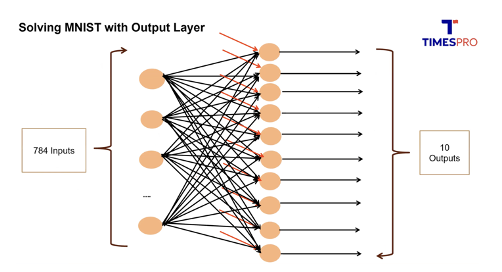

#### Number of Trainable parameters

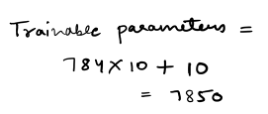

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
#Loding the MNIST dataset
(features_train, labels_train),(features_test, labels_test) = mnist.load_data()

In [6]:
features_train.shape

(60000, 28, 28)

In [7]:
features_test.shape

(10000, 28, 28)

In [8]:
features_train[0].shape

(28, 28)

In [9]:
labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Normalizing Data

The images are having pixel values b/w 0 to 255. With this large spread of values (spread of r data is b/w 0 to 255) convergence (reaching the minima point for your loss function) becomes a problem, it will take a long time and sometimes ur neural n/w breaks such that u can't find a minima point in such large varied data. Hence u need to scale/normalize ur data. Below we do **min-max normalization.**

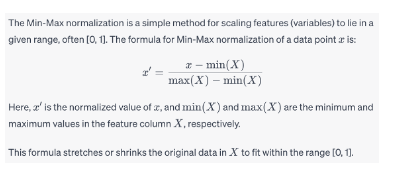

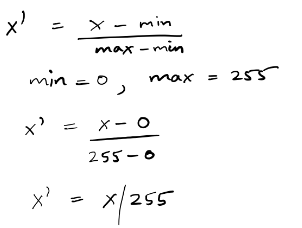

Hence we are dividing by 255 below, it is doing **min-max scaling. This technique will help in faster convergence and it will only give you +ve values. Images pixel values should never take -ve values.**

*Another normalization technique is Standardization where we subtract from mean and divide by standard deviation* 

We dont use this in Image cz that will result in standard normal observations which u used in standard ML algos. For images, where pixel intensities do not usually follow a Gaussian distribution, this method can be more appropriate.

The pixel values will be b/w 0 and 1 after min-max. We don't want standard normal values for r pixel cz those standard normal values might have -ve values as well. We dont want -ve pixel values to be fed to r neural n/w.

In [10]:
#Normalize the data
features_train=features_train / 255.0

features_test = features_test / 255.0

In [11]:
#model creation

In [12]:
tf.keras.utils.set_random_seed(42)

**Flatten** is used to feed data to neural n/w in a row format for each image by flattening the image/matrix. 28 * 28 matrix for each row is converted to flattened 784 pixel values for each row.

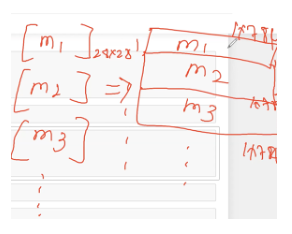

In [13]:
# layers
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #784
model.add(Dense(10,activation='softmax'))

2023-08-31 23:04:45.612503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Below output labels are label encoded hence we use  loss='sparse_categorical_crossentropy', in case labels are one hot encoded we use categorical_crossentropy for loss function.

In handwritten digits o/p is already label encoded but in case of data like cat, dog, crow, frog we will have to label encode the data/labels ourselves.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # label encoded outputs e.g. 1,2,3 ..
              metrics=['accuracy'])

Out of 60000 samples i have in training, i want to validate with 0.2 i.e. 10000 samples in each epoch. With whatever weights i learn then & there itself i want to validate it with 10K samples in each epoch. I will get validation accuracy along with my training accuracy.

At the epoch level u want to see if u have overfitting or not, for that u will have some unseen data whose percentage we specify through validation_split term which will be kept aside from the training data itself.

If number of training samples is less, its hard to take out validation data from that. Checking the score on unseen data at each epoch level is important to figure out if any overfitting. In every epoch the same validation data i.e. the seperated data will be used it will not be different in each epoch.

In every epoch we will see training accuracy and loss. Also validation accuracy and loss. For training accuracy and loss values keep on changing until 1500th batch is reached. Then last weights and biases value or aggregated values of all mini-batches is the final model for that particular epoch and which will be used for validation. Validation accuracy and loss are only calculated after completion of 1500th batch of training.

In [16]:
#training
model.fit(features_train, labels_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 1s 698us/step - loss: 0.5064 - accuracy: 0.8674 - val_loss: 0.3181 - val_accuracy: 0.9134
Epoch 2/10
1500/1500 [==============================] - 1s 628us/step - loss: 0.3175 - accuracy: 0.9113 - val_loss: 0.2911 - val_accuracy: 0.9168
Epoch 3/10
1500/1500 [==============================] - 1s 627us/step - loss: 0.2939 - accuracy: 0.9174 - val_loss: 0.2788 - val_accuracy: 0.9240
Epoch 4/10
1500/1500 [==============================] - 1s 625us/step - loss: 0.2813 - accuracy: 0.9208 - val_loss: 0.2714 - val_accuracy: 0.9234
Epoch 5/10
1500/1500 [==============================] - 1s 626us/step - loss: 0.2738 - accuracy: 0.9240 - val_loss: 0.2702 - val_accuracy: 0.9260
Epoch 6/10
1500/1500 [==============================] - 1s 641us/step - loss: 0.2680 - accuracy: 0.9244 - val_loss: 0.2646 - val_accuracy: 0.9286
Epoch 7/10
1500/1500 [==============================] - 1s 653us/step - loss: 0.2636 - accuracy: 0.9266 - val_loss: 0.2637 -

In model.evaluate we r giving both features & labels cz it internally first gets predictions & then compares it with actual labels to get the accuracy & loss on test set.

In [17]:
#Test
model.evaluate(features_test, labels_test)

313/313 [==============================] - 0s 456us/step - loss: 0.2701 - accuracy: 0.9243


[0.27011117339134216, 0.9243000149726868]

In [18]:
#inference

In Scikit learn predict was a smart predict, it did the argmax on returned probabilities and just returned you directly the label however here in keras predict is returning the probabilities by default. We have to ourselves do argmax to get the corresponding label.

In [19]:
#run inference on all the test images
result=model.predict(features_test)

313/313 [==============================] - 0s 368us/step


In [20]:
result.shape

(10000, 10)

You get probabilities of result being belonging to each class. One with max probability is the actual digit predicted. e.g. in result[0] it is 7 and for result[5] it is 1. Be it sigmoid or softmax output is going to be probabilities.

In [21]:
result[0]

array([1.33918934e-06, 1.10094989e-11, 3.51859262e-06, 7.26793101e-03,
       2.64895988e-07, 1.91705749e-05, 4.90358405e-12, 9.92175281e-01,
       1.19517945e-05, 5.20544301e-04], dtype=float32)

In [22]:
result[5]

array([5.2275986e-08, 9.9385321e-01, 1.1785331e-03, 1.3476051e-03,
       9.7290249e-06, 2.7229369e-05, 1.1275409e-05, 1.4687105e-03,
       1.7763129e-03, 3.2740575e-04], dtype=float32)

In [23]:
max(result[5])

0.9938532

In [24]:
#sample location 
n=2000

In [25]:
#pick any particular result location
result[n]

array([1.5921642e-05, 2.3908408e-04, 1.9027060e-02, 6.2727422e-04,
       9.2740403e-03, 2.4275717e-03, 9.5540243e-01, 1.7212361e-07,
       1.2821571e-02, 1.6479338e-04], dtype=float32)

*<font color=blue>max(result[0]) will give you maximum value while result[0].argmax() will give you index of maximum value.*

In [26]:
result[n].argmax()

6

In [27]:
#check the corresponding label
labels_test[n]

6